<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

In [154]:
(train_data , train_label) , (test_data , test_label) = fashion_mnist.load_data()

In [155]:
targets = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

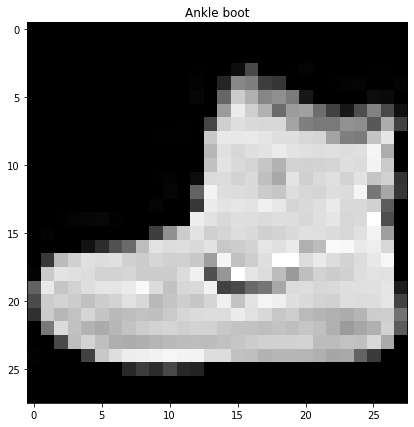

In [156]:
plt.figure(figsize = (10 , 7))
plt.imshow(train_data[0] , cmap = "gray")
plt.title(targets[train_label[0]])

In [157]:
a = np.random.randint(0 , 100 , size = [1])
a

array([12])

In [158]:
def plot_random_fashion_mnist(data, label, number_of_images = 16):
  '''this method will plot some fashoin mnist images randomly
  '''

  plt.figure(figsize = (10 , 7))

  for i in range(number_of_images):

    plt.subplot(4 , 4 , i + 1)

    rand = np.random.randint(0 , len(data) , size = [1])

    plt.imshow(np.squeeze(data[rand] , axis = 0), cmap = "gray")
    plt.title(targets[int(label[rand])])
    plt.subplots_adjust(right=1.5)
    plt.subplots_adjust(top=2)

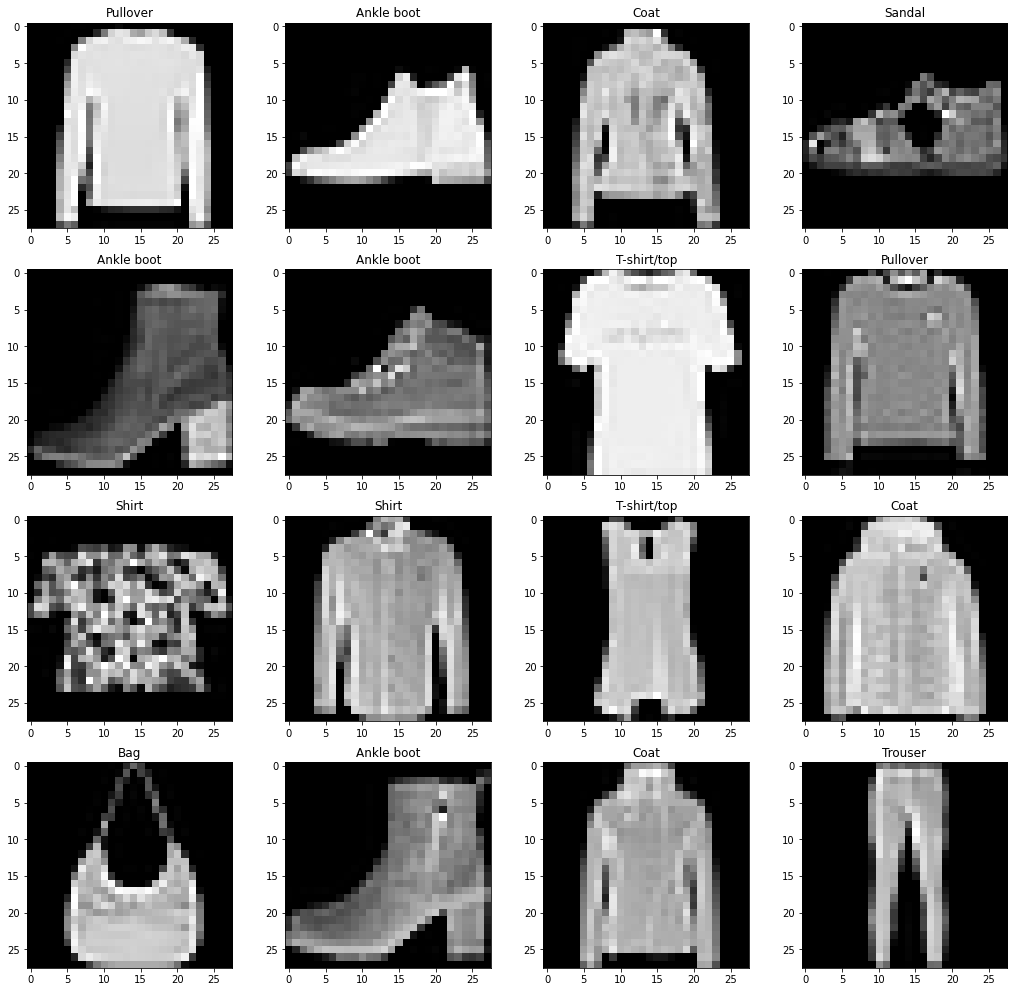

In [159]:
plot_random_fashion_mnist(train_data , train_label)

In [160]:
train_label = tf.keras.utils.to_categorical(train_label , num_classes = 10)

In [161]:
test_label = tf.keras.utils.to_categorical(test_label , num_classes = 10)

In [162]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28 , 28) , name = "input_layer"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
] , name = "model0")

In [163]:
model0.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1) , metrics = ["mae" , "mse"])

In [164]:
history0 = model0.fit(train_data , train_label , epochs = 3 , validation_data = (test_data , test_label))

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 500055.4062 - mae: 0.1800 - mse: 0.0903 - val_loss: 2.3033 - val_mae: 0.1800 - val_mse: 0.0900
Epoch 2/3
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3034 - mae: 0.1800 - mse: 0.0900 - val_loss: 2.3033 - val_mae: 0.1800 - val_mse: 0.0900
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3034 - mae: 0.1800 - mse: 0.0900 - val_loss: 2.3033 - val_mae: 0.1800 - val_mse: 0.0900


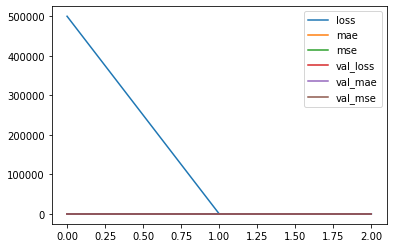

In [165]:
pd.DataFrame(history0.history).plot()